# FIFA19 DATA ANALYSIS
FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series. It is the 26th installment in the FIFA series, and was released on 28 September 2018 for PlayStation 3, PlayStation 4, Xbox 360, Xbox One, Nintendo Switch, and Microsoft Windows.

As with FIFA 18, Cristiano Ronaldo featured as the cover athlete of the regular edition: however, following his unanticipated transfer from Spanish club Real Madrid to Italian side Juventus, new cover art was released. He also appeared with Neymar in the cover of the Champions edition. From February 2019, an updated version featured Neymar, Kevin De Bruyne and Paulo Dybala on the cover of the regular edition.

The game features the UEFA club competitions for the first time, including the UEFA Champions League and UEFA Europa League and the UEFA Super Cup as well.
The dataset consists of information related to players in FIFA19.(source from wikipedia)

## Downloading the Dataset
  Lets download the dataset using opendatasets library

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
fifa_data_url='https://www.kaggle.com/karangadiya/fifa19?select=data.csv'

In [3]:
#fifa_data_url='https://www.kaggle.com/karangadiya/fifa19?select=data.csv'

In [4]:
import opendatasets as od
od.download(fifa_data_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: syedalauddinbukhari
Your Kaggle Key: ········


100%|██████████| 2.18M/2.18M [00:00<00:00, 130MB/s]

The dataset has been downloaded and extracted.

In [5]:

data_dir = "./fifa19"

In [6]:
import os
os.listdir(data_dir)

['data.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "FIFA19-cousre-project" # set a project name 

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [224]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "syedalauddin-b/fifa19-cousre-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/syedalauddin-b/fifa19-cousre-project


'https://jovian.ml/syedalauddin-b/fifa19-cousre-project'

## Data Preparation and Cleaning

Now the data has been downloaded,we shall import pandas and numpy for futher utilization.
The first step would be data preparation and cleaning,In this step we will load  data into dataframe using pandas pd.read_csv method then clean it by removing or choosing certain columns,cleaning nan values, handle missing, incorrect and invalid data etc



> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [11]:
!pip install pandas --upgrade --quiet

In [12]:
!pip install numpy --upgrade --quiet

In [13]:
import pandas as pd

In [14]:
import numpy as np

In [15]:
fifa_raw_df=pd.read_csv("fifa19/data.csv")

In [16]:
fifa_raw_df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


Now the data has loaded into dataframe let's check out the data info

In [17]:
fifa_raw_df.columns


Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

while the dataset contains wealth of information,we will limit our information to the following area.

-Demographics of fifa's players including they age,nationality,overall and potential rating.


In [18]:
fifa_selected_columns=fifa_raw_df[[ "Unnamed: 0",   "ID",
          "Name",
           "Age",
           "Nationality",
          "International Reputation",
           "Overall",
             "Potential",
             "Club",
                "Stamina",
                  "Strength",
                ]]

Now we have seperated certain columns for our futher analysics.

In [19]:
fifa_selected_columns

,Unnamed: 0,ID,Name,Age,Nationality,International Reputation,Overall,Potential,Club,Stamina,Strength
0,0,158023,L. Messi,31,Argentina,5.0,94,94,FC Barcelona,72.0,59.0
1,1,20801,Cristiano Ronaldo,33,Portugal,5.0,94,94,Juventus,88.0,79.0
2,2,190871,Neymar Jr,26,Brazil,5.0,92,93,Paris Saint-Germain,81.0,49.0
3,3,193080,De Gea,27,Spain,4.0,91,93,Manchester United,43.0,64.0
4,4,192985,K. De Bruyne,27,Belgium,4.0,91,92,Manchester City,90.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,England,1.0,47,65,Crewe Alexandra,40.0,47.0
18203,18203,243165,N. Christoffersson,19,Sweden,1.0,47,63,Trelleborgs FF,43.0,67.0
18204,18204,241638,B. Worman,16,England,1.0,47,67,Cambridge United,55.0,32.0
18205,18205,246268,D. Walker-Rice,17,England,1.0,47,66,Tranmere Rovers,40.0,48.0


We can see we get the DataFrame of selected_columns. Looking at the column's seems like there is a column name "Unnamed: 0", which indicates the total number of players just like index, let's just rename this specific column to "Total Players".But before we begin renaming(prepareding), let's just copy columns, which result in other entity (seperated data from raw(original) data),so that we does change the raw data but make a certain separated data from this columns.

In [20]:
fifa19_df=fifa_selected_columns.copy()

By using copy() method we can copy data into other variable. Making changes in this data doesn't effect the original data

Now lets rename the column "Unnamed: 0" to "Total Players"

In [21]:
fifa19_df.rename(columns={"Unnamed: 0":"Total Players"},inplace=True)

In [22]:
fifa19_df

,Total Players,ID,Name,Age,Nationality,International Reputation,Overall,Potential,Club,Stamina,Strength
0,0,158023,L. Messi,31,Argentina,5.0,94,94,FC Barcelona,72.0,59.0
1,1,20801,Cristiano Ronaldo,33,Portugal,5.0,94,94,Juventus,88.0,79.0
2,2,190871,Neymar Jr,26,Brazil,5.0,92,93,Paris Saint-Germain,81.0,49.0
3,3,193080,De Gea,27,Spain,4.0,91,93,Manchester United,43.0,64.0
4,4,192985,K. De Bruyne,27,Belgium,4.0,91,92,Manchester City,90.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,England,1.0,47,65,Crewe Alexandra,40.0,47.0
18203,18203,243165,N. Christoffersson,19,Sweden,1.0,47,63,Trelleborgs FF,43.0,67.0
18204,18204,241638,B. Worman,16,England,1.0,47,67,Cambridge United,55.0,32.0
18205,18205,246268,D. Walker-Rice,17,England,1.0,47,66,Tranmere Rovers,40.0,48.0


To say that Total_Players column represent total number of players is incorrent since it starts from 0 if we want we can always drop the columne using drop() method

In [23]:
fifa_dropexample=fifa19_df.copy()

In [24]:
fifa_drop_column=fifa_dropexample.drop(columns="Total Players")

In [25]:
fifa_drop_column

,ID,Name,Age,Nationality,International Reputation,Overall,Potential,Club,Stamina,Strength
0,158023,L. Messi,31,Argentina,5.0,94,94,FC Barcelona,72.0,59.0
1,20801,Cristiano Ronaldo,33,Portugal,5.0,94,94,Juventus,88.0,79.0
2,190871,Neymar Jr,26,Brazil,5.0,92,93,Paris Saint-Germain,81.0,49.0
3,193080,De Gea,27,Spain,4.0,91,93,Manchester United,43.0,64.0
4,192985,K. De Bruyne,27,Belgium,4.0,91,92,Manchester City,90.0,75.0
...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,1.0,47,65,Crewe Alexandra,40.0,47.0
18203,243165,N. Christoffersson,19,Sweden,1.0,47,63,Trelleborgs FF,43.0,67.0
18204,241638,B. Worman,16,England,1.0,47,67,Cambridge United,55.0,32.0
18205,246268,D. Walker-Rice,17,England,1.0,47,66,Tranmere Rovers,40.0,48.0


As you can see in above example we use drop method to drop the Total_Players Column and store it in another variable fifa_drop_column.

Now back to our main variable.

In [26]:
fifa19_df

,Total Players,ID,Name,Age,Nationality,International Reputation,Overall,Potential,Club,Stamina,Strength
0,0,158023,L. Messi,31,Argentina,5.0,94,94,FC Barcelona,72.0,59.0
1,1,20801,Cristiano Ronaldo,33,Portugal,5.0,94,94,Juventus,88.0,79.0
2,2,190871,Neymar Jr,26,Brazil,5.0,92,93,Paris Saint-Germain,81.0,49.0
3,3,193080,De Gea,27,Spain,4.0,91,93,Manchester United,43.0,64.0
4,4,192985,K. De Bruyne,27,Belgium,4.0,91,92,Manchester City,90.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,England,1.0,47,65,Crewe Alexandra,40.0,47.0
18203,18203,243165,N. Christoffersson,19,Sweden,1.0,47,63,Trelleborgs FF,43.0,67.0
18204,18204,241638,B. Worman,16,England,1.0,47,67,Cambridge United,55.0,32.0
18205,18205,246268,D. Walker-Rice,17,England,1.0,47,66,Tranmere Rovers,40.0,48.0


Shape of dataframe(rows and columns) can be check by using  shpe function

In [27]:
fifa19_df.shape

(18207, 11)

Information of dataframe can be check by using .info() method

In [28]:
fifa19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Total Players             18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Nationality               18207 non-null  object 
 5   International Reputation  18159 non-null  float64
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Stamina                   18159 non-null  float64
 10  Strength                  18159 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.5+ MB


Statistics information for numeric columns can be found by using .describe() method

In [29]:
fifa19_df.describe()

,Total Players,ID,Age,International Reputation,Overall,Potential,Stamina,Strength
count,18207.000000,18207.000000,18207.000000,18159.000000,18207.000000,18207.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,1.113222,66.238699,71.307299,63.219946,65.311967
std,5256.052511,29965.244204,4.669943,0.394031,6.908930,6.136496,15.894741,12.557000
min,0.000000,16.000000,16.000000,1.000000,46.000000,48.000000,12.000000,17.000000
25%,4551.500000,200315.500000,21.000000,1.000000,62.000000,67.000000,56.000000,58.000000
50%,9103.000000,221759.000000,25.000000,1.000000,66.000000,71.000000,66.000000,67.000000
75%,13654.500000,236529.500000,28.000000,1.000000,71.000000,75.000000,74.000000,74.000000
max,18206.000000,246620.000000,45.000000,5.000000,94.000000,95.000000,96.000000,97.000000


Seems like datadrame is pretty much clear but let's check out the missing values

Nan values in a dataframe columns can be found by using isnull() along side sum() which will return total number of nan values in all columns.

In [30]:
fifa19_df.isnull().sum()

Total Players                 0
ID                            0
Name                          0
Age                           0
Nationality                   0
International Reputation     48
Overall                       0
Potential                     0
Club                        241
Stamina                      48
Strength                     48
dtype: int64

Look's like we have  some nan values in certain columns, let's just check it out if it was certain to have those values or it mind be a data entry error.

In [31]:
fifa19_df[fifa19_df["International Reputation"].isnull()]

,Total Players,ID,Name,Age,Nationality,International Reputation,Overall,Potential,Club,Stamina,Strength
13236,13236,177971,J. McNulty,33,Scotland,NaN,62,62,Rochdale,NaN,NaN
13237,13237,195380,J. Barrera,29,Nicaragua,NaN,62,62,Boyacá Chicó FC,NaN,NaN
13238,13238,139317,J. Stead,35,England,NaN,62,62,Notts County,NaN,NaN
13239,13239,240437,A. Semprini,20,Italy,NaN,62,72,Brescia,NaN,NaN
13240,13240,209462,R. Bingham,24,England,NaN,62,66,Hamilton Academical FC,NaN,NaN
13241,13241,219702,K. Dankowski,21,Poland,NaN,62,72,Śląsk Wrocław,NaN,NaN
13242,13242,225590,I. Colman,23,Argentina,NaN,62,70,Club Atlético Aldosivi,NaN,NaN
13243,13243,233782,M. Feeney,19,England,NaN,62,78,Everton,NaN,NaN
13244,13244,239158,R. Minor,30,Denmark,NaN,62,62,Hobro IK,NaN,NaN
13245,13245,242998,Klauss,21,Brazil,NaN,62,69,HJK Helsinki,NaN,NaN


By researching online from various source's we came to this conclusion that this is  indeed nan values. and this details were missing from FIFA19 game.

In [32]:
fifa19_df[fifa19_df["Club"].isnull()]

,Total Players,ID,Name,Age,Nationality,International Reputation,Overall,Potential,Club,Stamina,Strength
452,452,207439,L. Paredes,24,Argentina,2.0,80,85,NaN,79.0,69.0
538,538,156713,A. Granqvist,33,Sweden,2.0,80,80,NaN,67.0,83.0
568,568,229909,A. Lunev,26,Russia,1.0,79,81,NaN,27.0,70.0
677,677,187347,I. Smolnikov,29,Russia,2.0,79,79,NaN,93.0,68.0
874,874,187607,A. Dzyuba,29,Russia,2.0,78,78,NaN,77.0,93.0
...,...,...,...,...,...,...,...,...,...,...,...
17197,17197,245164,V. Kaith,21,India,1.0,55,64,NaN,16.0,56.0
17215,17215,243131,K. Taimi,26,Finland,1.0,55,57,NaN,56.0,76.0
17339,17339,233526,S. Passi,23,India,1.0,54,63,NaN,59.0,62.0
17436,17436,236452,D. Lalhlimpuia,20,India,1.0,54,67,NaN,50.0,58.0


By analysing from online sources,we came to this conclusion that this player's was not in any certain clubs

It looks like our data is clear and is ready for next analysis step.

To view a random sample of dataset we use sample() methond alone dataframe.

In [33]:
fifa19_df.sample(10)

,Total Players,ID,Name,Age,Nationality,International Reputation,Overall,Potential,Club,Stamina,Strength
3209,3209,204542,Y. Yotún,28,Peru,1.0,73,73,Orlando City SC,85.0,59.0
2032,2032,214763,P. Goltz,33,Argentina,1.0,75,75,Boca Juniors,67.0,85.0
17385,17385,238705,V. Piechocki,21,France,1.0,54,63,Stade de Reims,49.0,52.0
4949,4949,244021,Y. Kalfa,25,Syria,1.0,70,72,Al Hazem,70.0,68.0
7846,7846,238636,R. Preißinger,21,Germany,1.0,67,75,1. FC Magdeburg,86.0,73.0
12517,12517,198519,C. Aasbak,24,Norway,1.0,63,67,Kristiansund BK,71.0,76.0
10981,10981,244993,I. Sankhon,22,Guinea,1.0,64,71,Sint-Truidense VV,71.0,69.0
7464,7464,232661,M. Bareiro,23,Argentina,1.0,68,79,Defensa y Justicia,73.0,70.0
10691,10691,224702,Liu Dianzuo,28,China PR,1.0,65,65,Guangzhou Evergrande Taobao FC,38.0,72.0
7790,7790,222240,Ji Xiang,28,China PR,1.0,67,67,Jiangsu Suning FC,74.0,79.0


In [34]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "syedalauddin-b/fifa19-cousre-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/syedalauddin-b/fifa19-cousre-project


'https://jovian.ml/syedalauddin-b/fifa19-cousre-project'

## Exploratory Analysis and Visualization

Lets explore the demographics of player's i.e Nationality,Age,potential,overall rating and stamina,
by going through each column and plot some basic charts.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [36]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

# Nationality

Let's look at the total number of Countries  and also plot some charts regarding the result

In [39]:
fifa19_df.Nationality.nunique()

164

We can identity the countries with the hightest number of players by using 
value counts method

In [40]:
top_countries=fifa19_df.Nationality.value_counts().head(15)
top_countries

England                1662
Germany                1198
Spain                  1072
Argentina               937
France                  914
Brazil                  827
Italy                   702
Colombia                618
Japan                   478
Netherlands             453
Sweden                  397
China PR                392
Chile                   391
Republic of Ireland     368
Mexico                  366
Name: Nationality, dtype: int64

Let's visualize top_countries using a bar chat

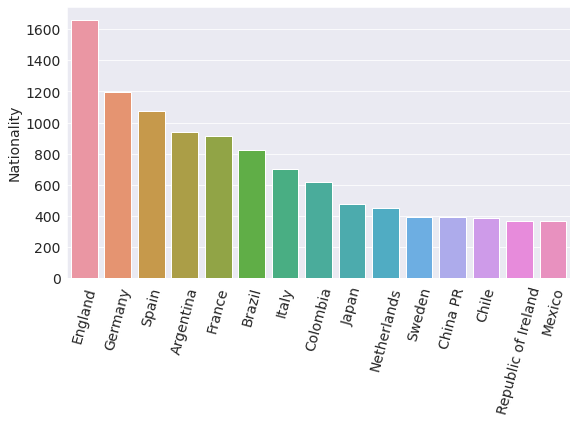

In [41]:
plt.xticks(rotation=75)
sns.barplot(top_countries.index,top_countries);

Look's like high number of players are from England ,Germany and spain.
European countries certainly play a important role in football history,
popular countries like France ,poland and italy etc has declared their national game as Football.Though many other countries like England has different national game,their give same priority to football too.


**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

# Age

Age is another factor in this data to look at,Age restriction doesn't apply much in FIFA19 ,they are many youngers players in FIFA19.
Let's have a look

Let's check out the average of player's age 

In [42]:
fifa19_df.Age.mean()



25.122205745043114

25 is the average age  in FIFA19

maximam age?

In [43]:
fifa19_df.Age.max()

45

45 is the maximum

Now lets visualize  the distribution of age using a histogram which is best suitable for it. 

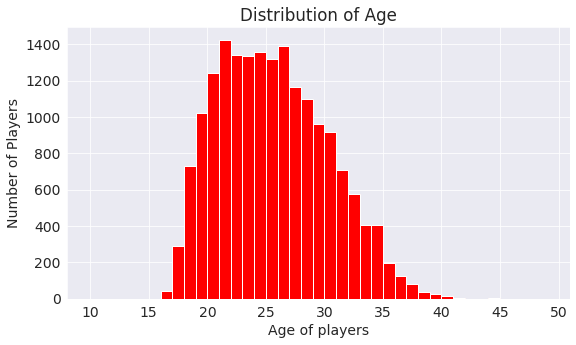

In [44]:
plt.title('Distribution of Age')
plt.xlabel('Age of players')
plt.ylabel('Number of Players')
plt.hist(fifa19_df.Age,bins=np.arange(10,50),color="Red");

by looking at the histogram we can say that many players are between 20-30,which is quiet general as football game required a lot of strenght and stamina,No wonder most players are between this age.

# International Reputation

International Reputation, also known as International Recognition, is an attribute that affects the player's rating according to his club's local and international prestige. It is based essentially on the popularity, history and results of them both.
let's analysis this specific column.

In [45]:
fifa19_df["International Reputation"]

0        5.0
1        5.0
2        5.0
3        4.0
4        4.0
        ... 
18202    1.0
18203    1.0
18204    1.0
18205    1.0
18206    1.0
Name: International Reputation, Length: 18207, dtype: float64

let's see the how many players are having how much International Reputation by using Value_counts method

In [46]:
fifa19_df["International Reputation"].value_counts()


1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

By looking at the output we can say that most players are having 1.0 Internatinal reputation and hardly 6 players are having highest International Reputation.

let's use countplot to visualize the International Reputation  of players
we can use countplot by using seaborn library function sns.countplot()

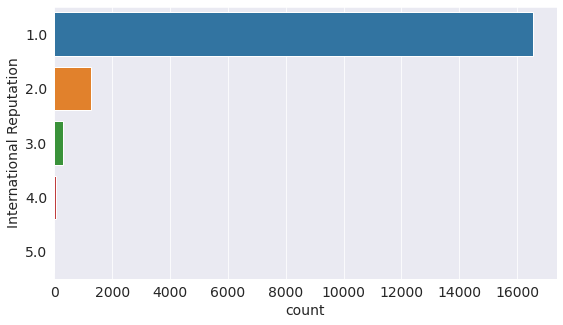

In [47]:
sns.countplot(y=fifa19_df["International Reputation"]);

let's again review this  in percentage

In [48]:
International_Reputation=fifa19_df["International Reputation"].value_counts()*100/fifa19_df['International Reputation'].count()

Text(0.5, 0, 'International Reputation')

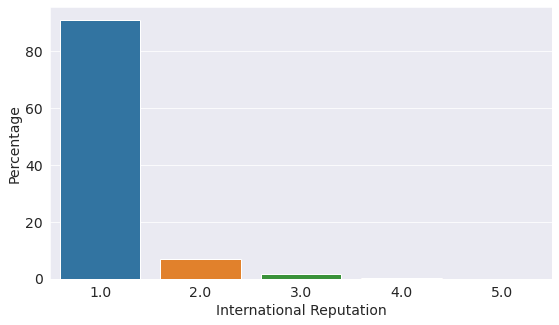

In [49]:
sns.barplot(y=International_Reputation,x=International_Reputation.index)
plt.ylabel("Percentage");
plt.xticks(rotation=0);
plt.xlabel("International Reputation")

In [50]:
International_Reputation

1.0    91.040256
2.0     6.944215
3.0     1.701636
4.0     0.280852
5.0     0.033041
Name: International Reputation, dtype: float64

Almost 91% player's are having international Reputation 1.0


# Stamina and Strength

Stamina and Strenght is essential for playing football,These two are very important factor.
lets analysis these both.

In [51]:
fifa19_df["Stamina"]


0        72.0
1        88.0
2        81.0
3        43.0
4        90.0
         ... 
18202    40.0
18203    43.0
18204    55.0
18205    40.0
18206    47.0
Name: Stamina, Length: 18207, dtype: float64

In [52]:
fifa19_df["Strength"]

0        59.0
1        79.0
2        49.0
3        64.0
4        75.0
         ... 
18202    47.0
18203    67.0
18204    32.0
18205    48.0
18206    60.0
Name: Strength, Length: 18207, dtype: float64

let's visualize both together for better understanding 

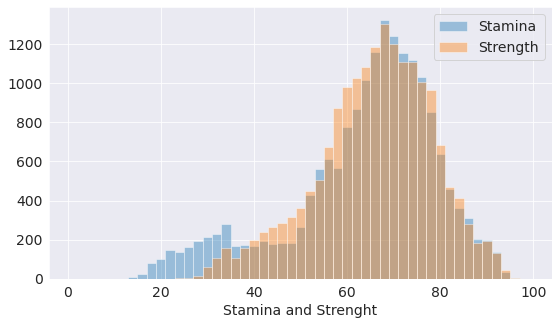

In [53]:
plt.hist(fifa19_df["Stamina"],alpha=0.4,bins=np.arange(1,100,2));
plt.hist(fifa19_df["Strength"],alpha=0.4,bins=np.arange(1,100,2));
plt.xlabel("Stamina and Strenght");
plt.legend(["Stamina","Strength"]);

Let'

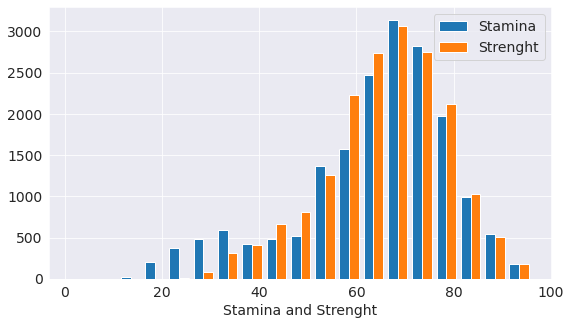

In [54]:
plt.hist([fifa19_df["Stamina"],fifa19_df["Strength"]],bins=np.arange(1,100,5))
plt.legend(["Stamina","Strenght"])
plt.xlabel("Stamina and Strenght");

By looking at that following histograms we can  say that most players with most stamina also has most strenght in them,while some players has stamina and no strenght.

# Overall and Potential Rating

Overall Rating
Overall Rating, OVR Rating or OVR in FIFA, FUT and FIFA Mobile is the average of the key Player Attributes rates of a player within their Potential rate calculated based on their position and international reputation. The OVR rating of a player determines their general performance quality and their value in FIFA.

In [55]:
fifa19_df.Overall

0        94
1        94
2        92
3        91
4        91
         ..
18202    47
18203    47
18204    47
18205    47
18206    46
Name: Overall, Length: 18207, dtype: int64

Potential Rating 
Potential decides what overall a player will be able to reach after a few seasons, although players can, of course, exceed or fall short of this target.

In [56]:
fifa19_df.Potential

0        94
1        94
2        93
3        93
4        92
         ..
18202    65
18203    63
18204    67
18205    66
18206    66
Name: Potential, Length: 18207, dtype: int64

Average Potential

In [57]:
fifa19_df["Potential"].mean()

71.30729939034437

Let's explorer relationship between Overall and Potential Rating.

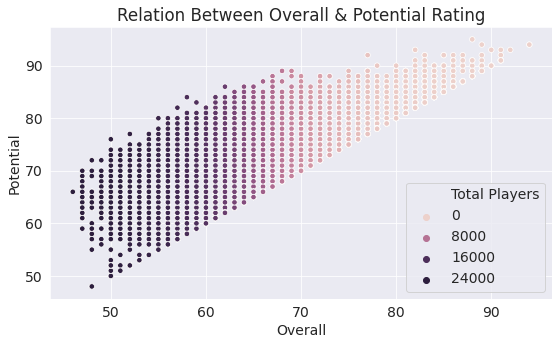

In [58]:
sns.scatterplot(fifa19_df["Overall"],fifa19_df["Potential"],hue=fifa19_df["Total Players"],s=30);
plt.title('Relation Between Overall & Potential Rating');


Let us save and upload our work to Jovian before continuing

By looking the chart we can see that most players having less overall rating has more potential,And only some players are having both potential and overall rating above 90.

We have done the analysis of our dataframe,let's move onto next session where we will ask and answer some question regarding our data.

In [59]:
import jovian

In [60]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "syedalauddin-b/fifa19-cousre-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/syedalauddin-b/fifa19-cousre-project


'https://jovian.ml/syedalauddin-b/fifa19-cousre-project'

## Asking and Answering Questions
In this section we will ask some random easy or hard question regarding information from dataset and try to answer them using operation and interesting visualizations 

> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: How many players are from India in FIFA19?

In [61]:
Team_India=fifa19_df[fifa19_df["Nationality"].str.contains("India")]
Team_India

,Total Players,ID,Name,Age,Nationality,International Reputation,Overall,Potential,Club,Stamina,Strength
8605,8605,190939,S. Chhetri,33,India,1.0,67,67,NaN,68.0,59.0
10011,10011,223763,S. Jhingan,24,India,1.0,65,71,NaN,63.0,79.0
12598,12598,217225,J. Lalpekhlua,27,India,1.0,63,64,NaN,60.0,63.0
12811,12811,225213,G. Singh Sandhu,26,India,1.0,63,68,NaN,36.0,70.0
13508,13508,238205,A. Edathodika,31,India,1.0,62,62,NaN,63.0,79.0
14054,14054,231461,P. Halder,25,India,1.0,61,67,NaN,76.0,64.0
14199,14199,228188,P. Kotal,24,India,1.0,61,66,NaN,64.0,67.0
14218,14218,208485,L. Ralte,25,India,1.0,61,62,NaN,55.0,58.0
14705,14705,223764,N. Das,24,India,1.0,60,65,NaN,60.0,58.0
14786,14786,233524,U. Singh,22,India,1.0,60,67,NaN,64.0,68.0


In [62]:
fifa19_df.Nationality.str.contains("India").sum()

30

India has 30 players in fifa19 game 

#### What are the minimum age of players , Who are those players and how many are they in FIFA19?

In [67]:
fifa19_df['Age']

0        31
1        33
2        26
3        27
4        27
         ..
18202    19
18203    19
18204    16
18205    17
18206    16
Name: Age, Length: 18207, dtype: int64

Let's find out minimum age using min() function

In [68]:
fifa19_df.Age.min()

16

16 is the minimum age of a player in fifa19

Let's find out who are those players

In [69]:
players_16=fifa19_df[fifa19_df["Age"]==16]
players_16

,Total Players,ID,Name,Age,Nationality,International Reputation,Overall,Potential,Club,Stamina,Strength
11457,11457,241266,W. Geubbels,16,France,1.0,64,86,AS Monaco,53.0,59.0
11732,11732,244403,A. Taoui,16,France,1.0,64,75,Toulouse Football Club,59.0,55.0
12496,12496,245616,Pelayo Morilla,16,Spain,1.0,63,81,Real Sporting de Gijón,48.0,62.0
12828,12828,246465,Guerrero,16,Spain,1.0,63,76,CF Rayo Majadahonda,56.0,55.0
13293,13293,246594,H. Massengo,16,France,1.0,62,75,AS Monaco,62.0,61.0
13567,13567,246419,Y. Verschaeren,16,Belgium,1.0,62,83,RSC Anderlecht,61.0,51.0
15363,15363,245015,Y. Roemer,16,Netherlands,1.0,59,75,VVV-Venlo,59.0,48.0
15746,15746,243169,Y. Begraoui,16,France,1.0,59,81,AJ Auxerre,70.0,47.0
15793,15793,241650,J. Lahne,16,Sweden,1.0,59,77,IF Brommapojkarna,76.0,57.0
16081,16081,241552,J. Italiano,16,Australia,1.0,58,79,Perth Glory,57.0,42.0


Above is the data about the players whose age is 16

In [70]:
players_16.nunique()

Total Players               42
ID                          42
Name                        42
Age                          1
Nationality                 19
International Reputation     1
Overall                     17
Potential                   16
Club                        38
Stamina                     26
Strength                    26
dtype: int64

There are 42 player's whose age is 16.

#### Q3: List out the players who has highest Potential and find the mean of Overall rating

let's list out 30 players with highest potential by using .sort_values method

sort_values return  a particluar column in ascending or descending order

In [71]:
Highest30_potential=fifa19_df.sort_values('Potential',ascending=False).head(30)

In [72]:
Highest30_potential

,Total Players,ID,Name,Age,Nationality,International Reputation,Overall,Potential,Club,Stamina,Strength
25,25,231747,K. Mbappé,19,France,3.0,88,95,Paris Saint-Germain,83.0,71.0
0,0,158023,L. Messi,31,Argentina,5.0,94,94,FC Barcelona,72.0,59.0
15,15,211110,P. Dybala,24,Argentina,3.0,89,94,Juventus,80.0,65.0
1,1,20801,Cristiano Ronaldo,33,Portugal,5.0,94,94,Juventus,88.0,79.0
2,2,190871,Neymar Jr,26,Brazil,5.0,92,93,Paris Saint-Germain,81.0,49.0
3,3,193080,De Gea,27,Spain,4.0,91,93,Manchester United,43.0,64.0
9,9,200389,J. Oblak,25,Slovenia,3.0,90,93,Atlético Madrid,41.0,78.0
229,229,230621,G. Donnarumma,19,Italy,3.0,82,93,Milan,34.0,72.0
1143,1143,238794,Vinícius Júnior,17,Brazil,1.0,77,92,Real Madrid,79.0,59.0
155,155,231443,O. Dembélé,21,France,3.0,83,92,FC Barcelona,73.0,46.0


#### Q4: What's is the total potential rating of a club?and how much is the maximum potential rating of a club? 

To find the total potential(adding of each players potential) of each club we will use groupby function which  will help us group certain column by column anad aggreate by using sum function which will add all players potential rating.

In [73]:
potentialofeachclub=fifa19_df.groupby("Club")["Potential"].sum()#grouping by club and adding  each potential rating of  player's in each club

potentialofeachclub


Club
 SSV Jahn Regensburg     2010
1. FC Heidenheim 1846    2014
1. FC Kaiserslautern     1817
1. FC Köln               2144
1. FC Magdeburg          1829
                         ... 
Zagłębie Sosnowiec       1616
Çaykur Rizespor          2150
Örebro SK                1796
Östersunds FK            1515
Śląsk Wrocław            1639
Name: Potential, Length: 651, dtype: int64

In [74]:
potentialofeachclub.max()


2815

2815 is the highest potential of a Club among Club's

#### Q5:Analysis both Juventus and FC barcelona Clubs

Juventus Football Club , colloquially known as Juventus and Juve , is a professional football club based in Turin, Piedmont, Italy, that competes in the Serie A, the top flight of Italian football. Nicknamed i Bianconeri (the Black and Whites) or la Vecchia Signora (the Old Lady), the club was founded in 1897 by a group of students from Turin. They have played home matches in grounds around its city, the latest being the 41,507-capacity Juventus Stadium since 2011.(from Wikipedia)

utbol Club Barcelona , commonly referred to as Barcelona and colloquially known as Barça ([ˈbaɾsə]), is a Spanish professional football club based in Barcelona.

Founded in 1899 by a group of Swiss, Spanish, English, and Catalan footballers led by Joan Gamper, the club has become a symbol of Catalan culture and Catalanism, hence the motto "Més que un club" ("More than a club"). Unlike many other football clubs, the supporters own and operate Barcelona. It is the fourth-most valuable sports team in the world, worth $4.06 billion, and the world's richest football club in terms of revenue, with an annual turnover of €840,8 million.(source from wikipedia)

Let's begin our analysis by seperating both club into individual dataframe

In [210]:
Team_juventus=fifa19_df[fifa19_df["Club"]=="Juventus"]
Team_juventus



,Total Players,ID,Name,Age,Nationality,International Reputation,Overall,Potential,Club,Stamina,Strength
1,1,20801,Cristiano Ronaldo,33,Portugal,5.0,94,94,Juventus,88.0,79.0
15,15,211110,P. Dybala,24,Argentina,3.0,89,94,Juventus,80.0,65.0
24,24,138956,G. Chiellini,33,Italy,4.0,89,89,Juventus,65.0,89.0
64,64,191043,Alex Sandro,27,Brazil,3.0,86,86,Juventus,92.0,79.0
65,65,190483,Douglas Costa,27,Brazil,3.0,86,86,Juventus,78.0,63.0
70,70,184344,L. Bonucci,31,Italy,3.0,86,86,Juventus,71.0,83.0
72,72,180206,M. Pjanić,28,Bosnia Herzegovina,3.0,86,86,Juventus,78.0,66.0
73,73,177509,M. Benatia,31,Morocco,3.0,86,86,Juventus,69.0,91.0
92,92,186153,W. Szczęsny,28,Poland,3.0,85,87,Juventus,45.0,65.0
99,99,179846,S. Khedira,31,Germany,3.0,85,85,Juventus,78.0,87.0


In [209]:
Team_Barcelona = fifa19_df[fifa19_df["Club"]=="FC Barcelona"]


In [212]:
Team_Barcelona

,Total Players,ID,Name,Age,Nationality,International Reputation,Overall,Potential,Club,Stamina,Strength
0,0,158023,L. Messi,31,Argentina,5.0,94,94,FC Barcelona,72.0,59.0
7,7,176580,L. Suárez,31,Uruguay,5.0,91,91,FC Barcelona,90.0,83.0
18,18,192448,M. ter Stegen,26,Germany,3.0,89,92,FC Barcelona,35.0,79.0
20,20,189511,Sergio Busquets,29,Spain,4.0,89,89,FC Barcelona,86.0,77.0
32,32,189242,Coutinho,26,Brazil,3.0,88,89,FC Barcelona,79.0,61.0
42,42,205600,S. Umtiti,24,France,3.0,87,92,FC Barcelona,78.0,84.0
49,49,189332,Jordi Alba,29,Spain,3.0,87,87,FC Barcelona,91.0,61.0
53,53,168651,I. Rakitić,30,Croatia,4.0,87,87,FC Barcelona,84.0,66.0
54,54,152729,Piqué,31,Spain,4.0,87,87,FC Barcelona,65.0,83.0
96,96,181872,A. Vidal,31,Chile,4.0,85,85,FC Barcelona,83.0,79.0


By using count method  lets see total players.

In [213]:
Team_juventus.count()

Total Players               25
ID                          25
Name                        25
Age                         25
Nationality                 25
International Reputation    25
Overall                     25
Potential                   25
Club                        25
Stamina                     25
Strength                    25
dtype: int64

In [214]:
Team_Barcelona.count()

Total Players               33
ID                          33
Name                        33
Age                         33
Nationality                 33
International Reputation    33
Overall                     33
Potential                   33
Club                        33
Stamina                     33
Strength                    33
dtype: int64

Now lets see which players are older in each club by using sort_values method

In [215]:
Team_juventus.sort_values("Age",ascending=False)

,Total Players,ID,Name,Age,Nationality,International Reputation,Overall,Potential,Club,Stamina,Strength
152,152,137186,A. Barzagli,37,Italy,3.0,84,84,Juventus,53.0,83.0
1,1,20801,Cristiano Ronaldo,33,Portugal,5.0,94,94,Juventus,88.0,79.0
24,24,138956,G. Chiellini,33,Italy,4.0,89,89,Juventus,65.0,89.0
139,139,181783,M. Mandžukić,32,Croatia,3.0,84,84,Juventus,83.0,85.0
99,99,179846,S. Khedira,31,Germany,3.0,85,85,Juventus,78.0,87.0
70,70,184344,L. Bonucci,31,Italy,3.0,86,86,Juventus,71.0,83.0
103,103,170890,B. Matuidi,31,France,3.0,85,85,Juventus,94.0,76.0
73,73,177509,M. Benatia,31,Morocco,3.0,86,86,Juventus,69.0,91.0
129,129,193082,J. Cuadrado,30,Colombia,3.0,84,84,Juventus,78.0,61.0
92,92,186153,W. Szczęsny,28,Poland,3.0,85,87,Juventus,45.0,65.0


In [85]:
Team_Barcelona.sort_values("Age",ascending=False)

,Total Players,ID,Name,Age,Nationality,International Reputation,Overall,Potential,Club,Stamina,Strength
1037,1037,157304,T. Vermaelen,32,Belgium,3.0,77,77,FC Barcelona,52.0,79.0
0,0,158023,L. Messi,31,Argentina,5.0,94,94,FC Barcelona,72.0,59.0
7,7,176580,L. Suárez,31,Uruguay,5.0,91,91,FC Barcelona,90.0,83.0
96,96,181872,A. Vidal,31,Chile,4.0,85,85,FC Barcelona,83.0,79.0
54,54,152729,Piqué,31,Spain,4.0,87,87,FC Barcelona,65.0,83.0
53,53,168651,I. Rakitić,30,Croatia,4.0,87,87,FC Barcelona,84.0,66.0
266,266,199987,J. Cillessen,29,Netherlands,3.0,82,84,FC Barcelona,40.0,67.0
49,49,189332,Jordi Alba,29,Spain,3.0,87,87,FC Barcelona,91.0,61.0
20,20,189511,Sergio Busquets,29,Spain,4.0,89,89,FC Barcelona,86.0,77.0
192,192,199564,Sergi Roberto,26,Spain,3.0,83,86,FC Barcelona,85.0,69.0


Looking above data we can say that A. Barzagli is oldest in juventus followed by Cristiano Ronaldo.
Where as in barcelona T. Vermaelen	 is oldest followed by L.Messi.

Visualizing age with strenght will give as a clarity about how the different is in Strength according to age. lets comapre these two by using scatter plot.

But before that lets just change the index of both dataframe.

In [216]:
s = pd.Series(np.arange(1,26))
team_juventus=Team_juventus.set_index(s)

In [181]:
S=pd.Series(np.arange(1,34))
team_barcelona=Team_Barcelona.set_index(S)


Now lets plot the scatter plot

Text(0.5, 1.0, 'Team Juventus')

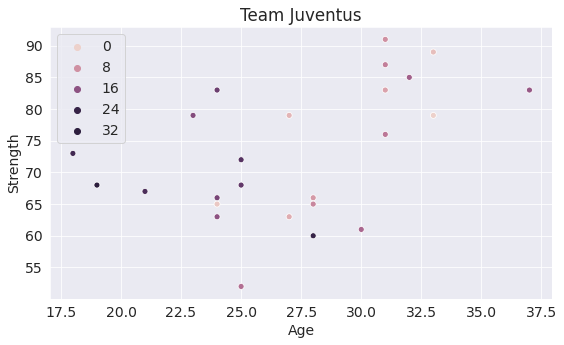

In [220]:
sns.scatterplot(Team_juventus["Age"],Team_juventus["Strength"],hue=team_juventus.index,data=team_juventus)
plt.title('Team Juventus')


Above chart tell us how strenght is adjusted  by age, well maintaing strenght mostly depend upon self discipline ,maintaing health diet,regular workout and running are main factors in strenght level.

Now  lets just plot a different in International Reputation of both clubs players by using histogram.

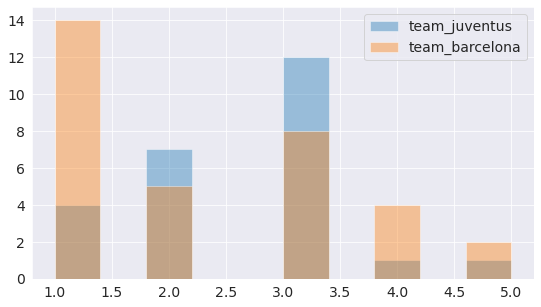

In [200]:
plt.hist(team_juventus["International Reputation"],alpha=0.4);
plt.hist(team_barcelona["International Reputation"],alpha=0.4);
plt.legend(["team_juventus","team_barcelona"])

above histogram shows the different in International Reputation of each players from two clubs

Let us save and upload our work to Jovian before continuing.

In [28]:
import jovian

In [226]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "syedalauddin-b/fifa19-cousre-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/syedalauddin-b/fifa19-cousre-project


'https://jovian.ml/syedalauddin-b/fifa19-cousre-project'

## Inferences and Conclusion

FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series. It is the 26th installment in the FIFA series.
In this analysis,



**We download the dataset of FIFA19 and load it into a dataframe**,




**Data Cleaning:** Choose some columns for analysis which includes columms like potential and Stamina,



**Found if there are data entry error in database:**  search for nan values in each column,

**Prepared Dataset for Futher Analysis:**clean the data and ready for analysis


**Exploratory Analysis and Visualization:** Explore,Visualiza and compare certains columns like "Age","Nationality",Stamina and Strength


**Asking and Answering Questions:** Asking questions regarding dataset 
i.e How many players are from India in FIFA19?



**Conclusion:** from these specific data we come to know about the differents between players strenghts, potentials, and Overall rating

In [30]:
import jovian

In [228]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "syedalauddin-b/fifa19-cousre-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/syedalauddin-b/fifa19-cousre-project


'https://jovian.ml/syedalauddin-b/fifa19-cousre-project'

## References and Future Work

**Reference** This dataset can be use for analysis between fifa previous and upcoming games i.e FIFA18,FIFA20

**Future Work** I will continue doing analysis based on data which i found interesting and surely if i can, i will go with a difficult data to smoothe by skils 

In [32]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
